In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
len(X_train)

60000

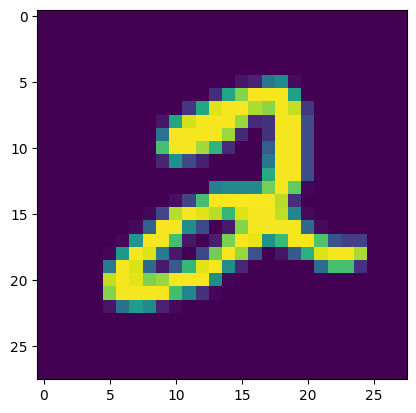

In [36]:
plt.imshow(X_train[5])

In [37]:
X_train=X_train/255
X_test=X_test/255

In [38]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [39]:
len(X_train)

60000

In [40]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)
X_train_flat.shape

(60000, 784)

In [41]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.8151 - loss: 0.7151
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.9152 - loss: 0.3070
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9197 - loss: 0.2839
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.9235 - loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 519us/step - accuracy: 0.9252 - loss: 0.2694


In [42]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9148 - loss: 0.3074


[0.2700250446796417, 0.9258000254631042]

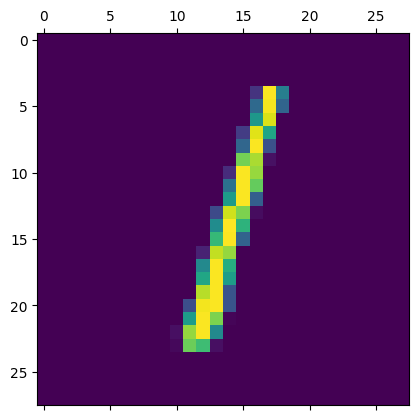

In [50]:
plt.matshow(X_test[2])

In [51]:
y_pred=model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


In [54]:
y_pred[2]

array([3.0927165e-04, 9.9115705e-01, 6.3175201e-01, 3.1883392e-01,
       2.1248130e-02, 9.8380193e-02, 1.4714764e-01, 1.1826970e-01,
       3.3353433e-01, 3.8470291e-02], dtype=float32)

In [56]:
np.argmax(y_pred[2])

1

In [57]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [62]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

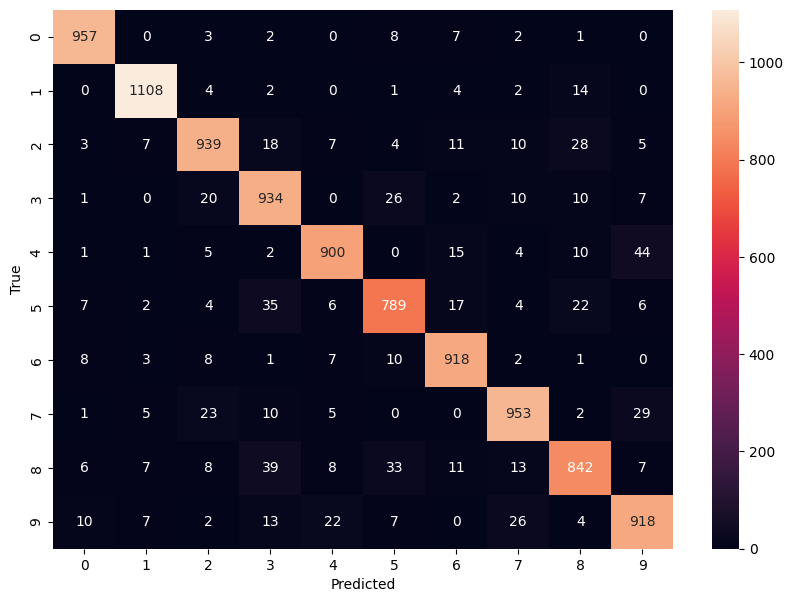

In [64]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [66]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5


C:\Users\Ali\Desktop\python\pythonProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - accuracy: 0.8700 - loss: 0.4605
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.9591 - loss: 0.1395
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9732 - loss: 0.0918
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9800 - loss: 0.0672
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.9844 - loss: 0.0520


In [67]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9681 - loss: 0.1041


[0.09366688132286072, 0.9706000089645386]

In [74]:
y_pred=model.predict(X_test_flat)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


In [75]:
cm =tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

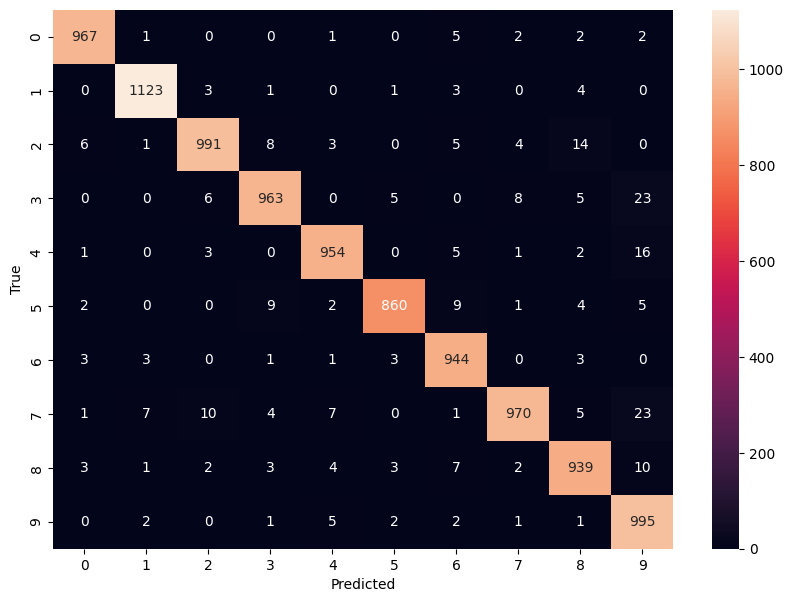

In [76]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()